# __Project Group 3 : Image Classification using Convolutional Neural Networks__


---

## __Choosing the data set__

We decided to work with a higher-resolution dataset to better understand how to handle images of varying sizes, bringing us closer to real-world scenarios. At the same time, we aim to focus on the learning process rather than grading outcomes, balancing both perspectives.

While the lower-resolution CIFAR-10 dataset requires less computational power and shorter training times, dataset #2 demands a more complex architecture.

As a team, we voted to prioritize gaining as much experience as possible with real-world challenges and chose dataset #2. We particularly anticipate learning new skills in data processing, coding, and CNN preprocessing, which will significantly enhance our expertise.




In [2]:
!pip install torchinfo

import pandas as pd
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchinfo import summary
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### __Visualization:__

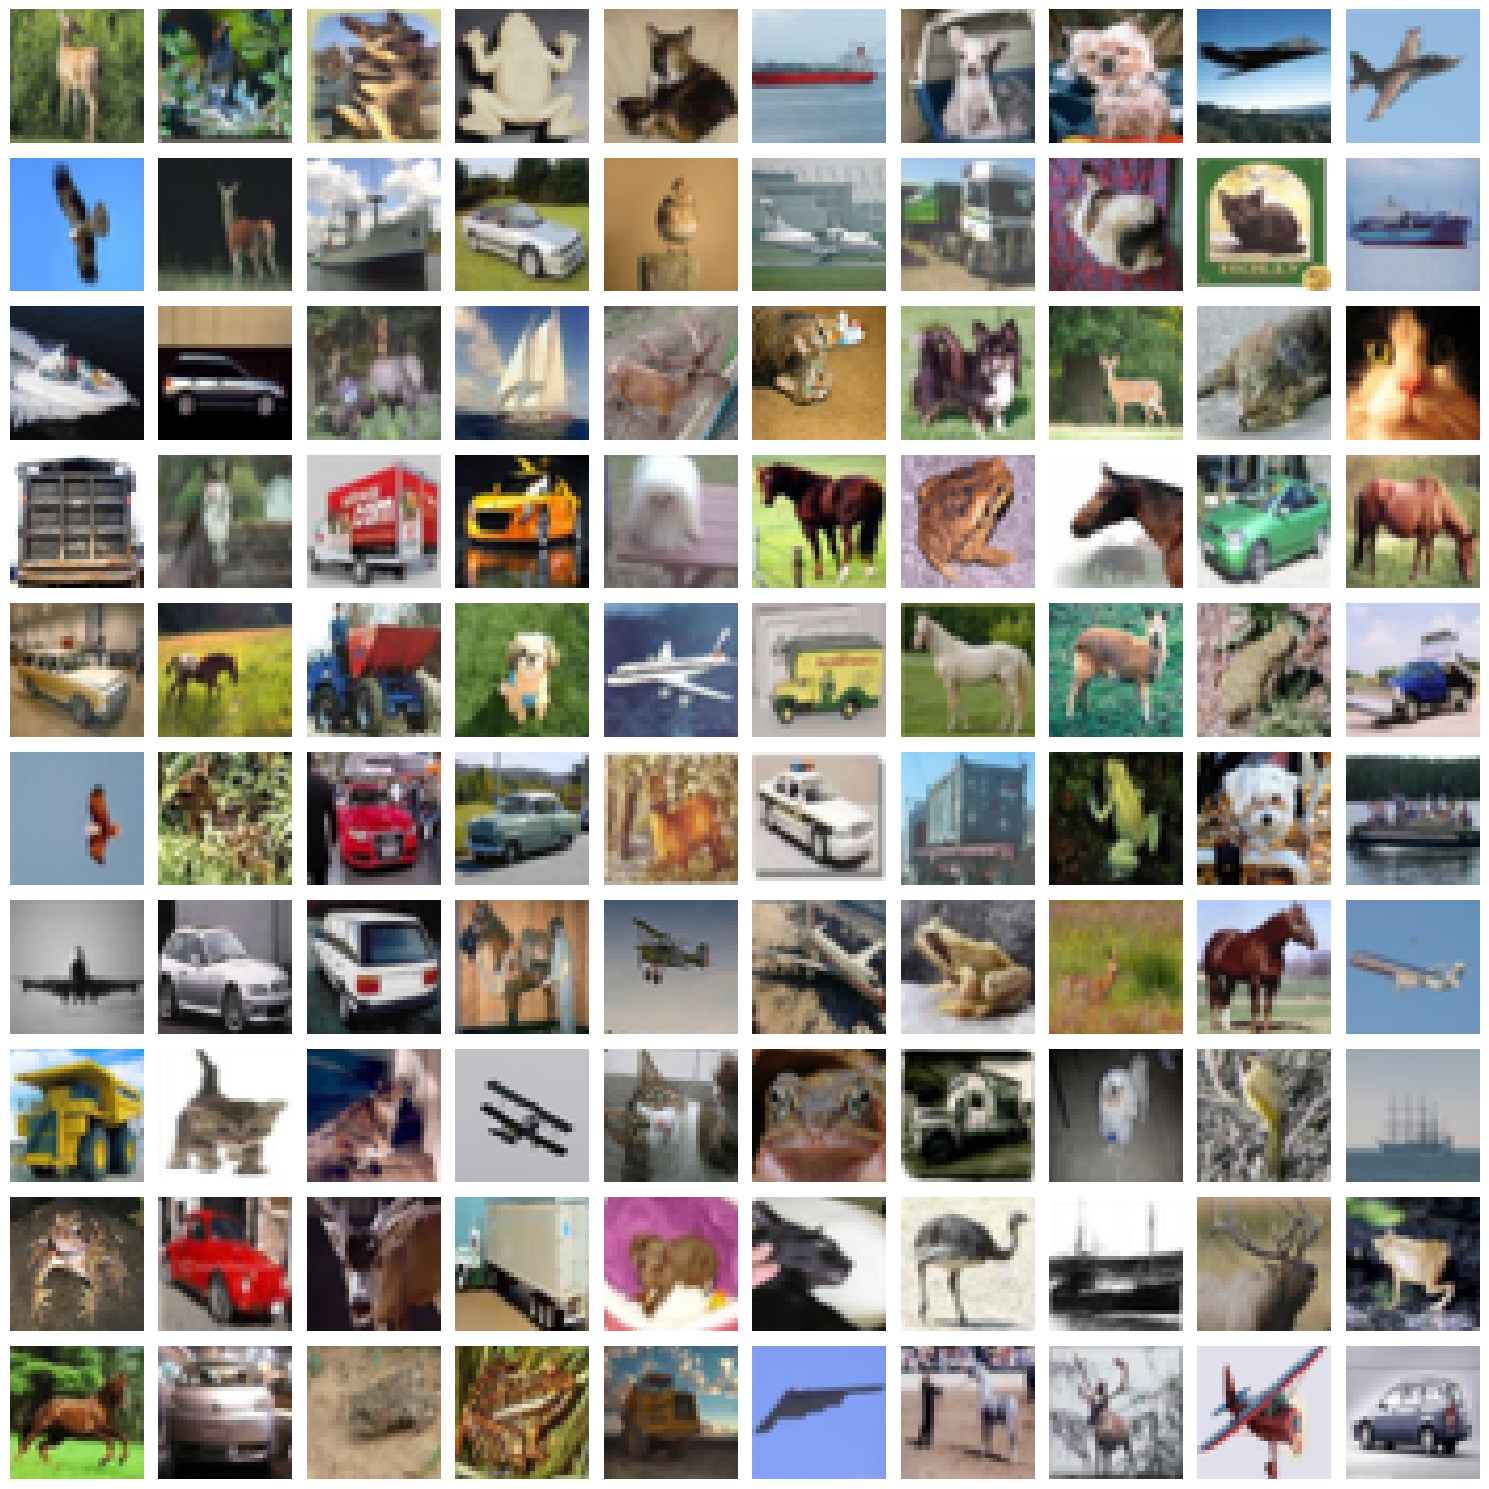

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 10x10 grid
plt.figure(figsize=(15, 15))  # Set the figure size for better visibility

# Randomly select 100 indices
random_indices = np.random.choice(len(x_train), 100, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)  # Create a 10x10 grid
    plt.imshow(x_train[idx], cmap=plt.get_cmap('gray'))  # Display a random image
    plt.axis('off')  # Turn off axes for cleaner visualization

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


### Get Range of values:

In [5]:
print("Minimum value:", np.min(x_train))  # Find the minimum value
print("Maximum value:", np.max(x_train))  # Find the maximum value
print("Range:", np.ptp(x_train))  # Range = max - min

Minimum value: 0
Maximum value: 255
Range: 255


### Visualization Content:

In [6]:
type(x_train)
print(x_train)

x_train.shape

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

(50000, 32, 32, 3)

### Coverting Labels:

In [7]:
from tensorflow.keras.utils import to_categorical

# Assuming your labels are in a variable `y`
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Example labels

# One-Hot Encode the labels
y_encoded = to_categorical(y, num_classes=10)

print(y_encoded)



[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Normalizing the Data:

In [8]:
print("Minimum value:", np.min(x_train))  # Find the minimum value
print("Maximum value:", np.max(x_train))  # Find the maximum value
print("Range:", np.ptp(x_train))  # Range = max - min

Minimum value: 0
Maximum value: 255
Range: 255


In [9]:
from tensorflow.keras.utils import to_categorical

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Assuming y_train and y_test are your target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


# __Defining the first model / taken from the Lab__

In [10]:
from keras.backend import clear_session
clear_session()

# Model / data parameters
num_classes = 10
input_shape_value = (32, 32, 3)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape = input_shape_value))
model.add(MaxPooling2D(pool_size=(2, 2)))
        
model.add(Flatten())


model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
batch_size_value = 512
epochs_value = 100

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size_value, epochs=epochs_value)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.1689 - loss: 2.2587
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2575 - loss: 2.1076
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2967 - loss: 1.9952
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3272 - loss: 1.9248
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3436 - loss: 1.8834
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.3583 - loss: 1.8450
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.3615 - loss: 1.8313
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3709 - loss: 1.8052
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.3789 - loss: 1.7823
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.3954 - loss: 1.7501
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3961 - loss: 1.7336
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy:

*   Plot the cross entropy loss curve and the accuracy curve

In [13]:
print(history.history.keys())

print(history.history['loss']) # returns the loss value at the end of each epoch
print(history.history['accuracy']) # returns the accuracy at the end of each epoch

dict_keys(['accuracy', 'loss'])
[2.2179365158081055, 2.0766336917877197, 1.9755918979644775, 1.9161769151687622, 1.878402829170227, 1.8470728397369385, 1.8258183002471924, 1.7978661060333252, 1.7688509225845337, 1.7427345514297485, 1.7252817153930664, 1.7020862102508545, 1.6847021579742432, 1.6668630838394165, 1.6439317464828491, 1.6300350427627563, 1.607898473739624, 1.5905894041061401, 1.5792876482009888, 1.55943763256073, 1.5489779710769653, 1.5245881080627441, 1.5119727849960327, 1.4927551746368408, 1.4843569993972778, 1.464141845703125, 1.4581977128982544, 1.4355804920196533, 1.4215457439422607, 1.413027286529541, 1.3995535373687744, 1.3847239017486572, 1.3734545707702637, 1.3578804731369019, 1.3498966693878174, 1.3403034210205078, 1.331000804901123, 1.3215293884277344, 1.3159613609313965, 1.300985336303711, 1.2939379215240479, 1.2894065380096436, 1.2731578350067139, 1.2650048732757568, 1.258577585220337, 1.2593241930007935, 1.2513418197631836, 1.2364630699157715, 1.23050606250762

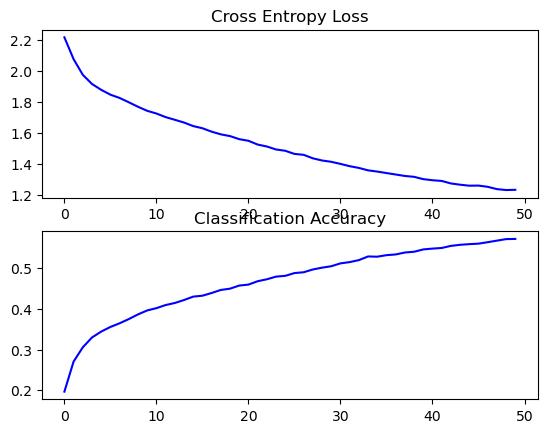

In [14]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.show()

### Confuion Matrix to see the performance: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


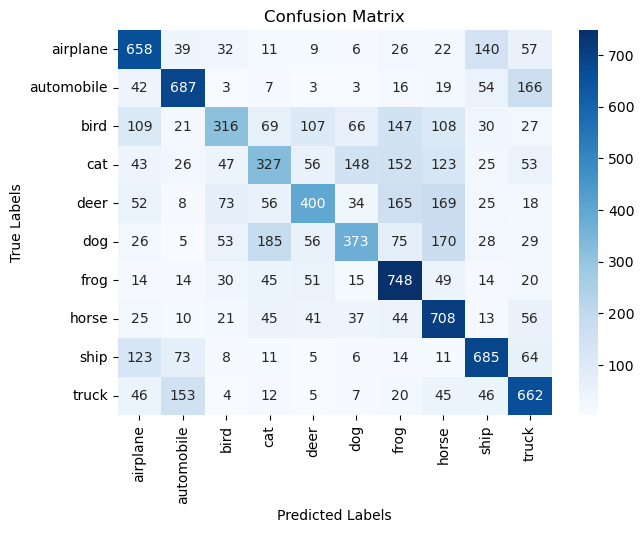

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(gt, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Scoring:

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.2580451965332031
Test accuracy: 0.5564000010490417


## Defining a #2 Model with deeper Network

In [16]:
from keras.backend import clear_session
clear_session()

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = keras.Sequential()

model2.add(Conv2D(32, (3, 3), padding='same', activation="relu", input_shape = input_shape_value))
model2.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation="softmax"))

model2.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
batch_size_value = 512
epochs_value = 100

model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history2 = model2.fit(x_train, y_train, batch_size=batch_size_value, epochs=epochs_value)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.1540 - loss: 2.2737
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - accuracy: 0.2527 - loss: 2.1099
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 258ms/step - accuracy: 0.2946 - loss: 2.0009
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.3204 - loss: 1.9369
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - accuracy: 0.3527 - loss: 1.8499
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.3678 - loss: 1.8062
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 255ms/step - accuracy: 0.3750 - loss: 1.7810
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.3886 - loss: 1.7355
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.3962 - loss: 1.7134
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.4111 - loss: 1.6788
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.4212 - loss: 1.6488
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

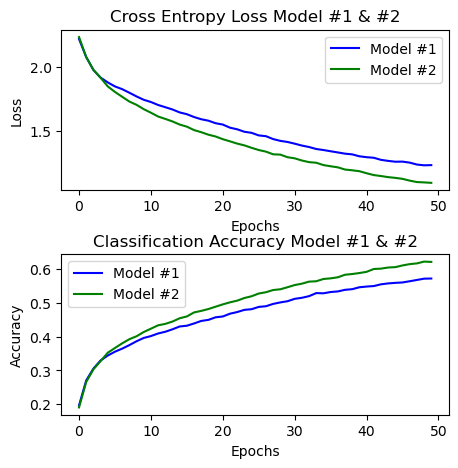

First Architecture Approach:
dict_keys(['accuracy', 'loss'])
Test loss: 1.2580451965332031
Test accuracy: 0.5564000010490417 

Deeper Architecture:
dict_keys(['accuracy', 'loss'])
Test loss: 1.1634559631347656
Test accuracy: 0.5874000191688538


In [48]:
plt.figure(figsize=(5, 5))  # Set figure size for better clarity

# First subplot for loss
plt.subplot(211)
plt.title('Cross Entropy Loss Model #1 & #2')
plt.plot(history.history['loss'], color='blue', label='Model #1')
plt.plot(history2.history['loss'], color='green', label='Model #2')
plt.xlabel('Epochs')  # Add x-label for consistency
plt.ylabel('Loss')    # Add y-label
plt.legend()

# Second subplot for accuracy
plt.subplot(212)
plt.title('Classification Accuracy Model #1 & #2')
plt.plot(history.history['accuracy'], color='blue', label='Model #1')
plt.plot(history2.history['accuracy'], color='green', label='Model #2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust spacing between plots to prevent overlap
plt.subplots_adjust(hspace=0.4)

plt.show()

# Print results for both models
print("\033[1mFirst Architecture Approach:\033[0m")
print(history.history.keys())
print("Test loss:", score[0])
print("Test accuracy:", score[1], "\n")

print("\033[1mDeeper Architecture:\033[0m")
print(history2.history.keys())
score2 = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])


### Confusion Matrix to see the performance better

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


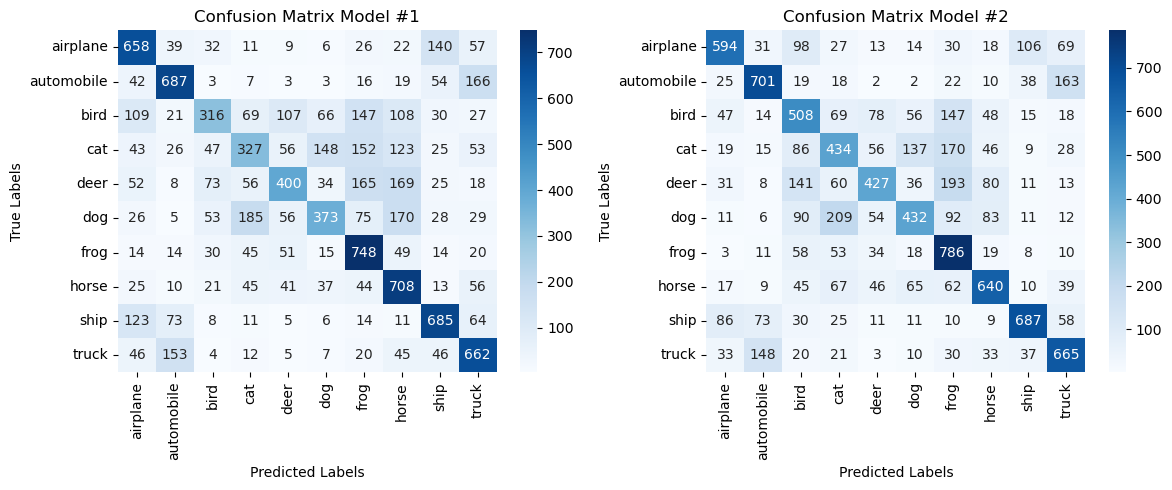

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth for model #1
predictions1 = model.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)
gt1 = np.argmax(y_test, axis=1)
cm1 = confusion_matrix(gt1, predictions1)

# Predictions and ground truth for model #2
predictions2 = model2.predict(x_test)
predictions2 = np.argmax(predictions2, axis=1)
gt2 = np.argmax(y_test, axis=1)
cm2 = confusion_matrix(gt2, predictions2)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion matrix for Model #1
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_title('Confusion Matrix Model #1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# Confusion matrix for Model #2
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[1])
axs[1].set_title('Confusion Matrix Model #2')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [51]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data

# Print the accuracy
print(f"Test Accuracy Model #1: {accuracy * 100:.2f}%")
print(f"Test Accuracy Model #2: {accuracy2 * 100:.2f}%")


Test Accuracy Model #1: 55.64%
Test Accuracy Model #2: 58.74%


## Defining a #3 Model with deeper Network / more complex 

In [52]:
from keras.backend import clear_session
clear_session()

In [53]:
from keras.backend import clear_session
clear_session()

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input shape for the VGG-like architecture
input_shape_value3 = (64, 64, 3)  # Input as per VGG guidelines
num_classes = 10  # Number of classes for classification

model3 = keras.Sequential()

# Block 1
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape_value3))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model3.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))  # Dense layer with 128 units
model3.add(Dropout(0.5))  # Regularization
model3.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation

model3.summary()  # Print the architecture summary


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize
import tensorflow as tf


# Resize x_train and x_test
x_train_resized = tf.image.resize(x_train, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
x_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size_value = 512
epochs_value = 50

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmenter
datagen = ImageDataGenerator(
    rotation_range=20,         # Rotate images by up to 20 degrees
    width_shift_range=0.2,     # Shift width by up to 20% of the image
    height_shift_range=0.2,    # Shift height by up to 20% of the image
    horizontal_flip=True,      # Flip the image horizontally
    zoom_range=0.2             # Zoom in/out by up to 20%
)

datagen.fit(x_train_resized)


# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(
    datagen.flow(x_train_resized, y_train, batch_size=batch_size_value),
    validation_data=(x_test_resized, y_test),
    epochs=epochs_value,
    steps_per_epoch=len(x_train_resized) // batch_size_value
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
12/97 ━━━━━━━━━━━━━━━━━━━━ 13:39 10s/step - accuracy: 0.1047 - loss: 2.3203

KeyboardInterrupt: 

NameError: name 'history3' is not defined

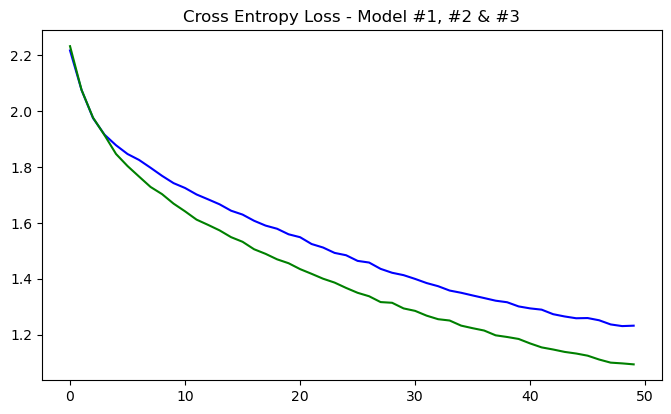

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))  # Set figure size for better clarity

# First subplot for loss
plt.subplot(211)
plt.title('Cross Entropy Loss - Model #1, #2 & #3')
plt.plot(history.history['loss'], color='blue', label='Model #1')
plt.plot(history2.history['loss'], color='green', label='Model #2')
plt.plot(history3.history['loss'], color='red', label='Model #3')
plt.xlabel('Epochs')  # Add x-label for consistency
plt.ylabel('Loss')    # Add y-label
plt.legend()

# Second subplot for accuracy
plt.subplot(212)
plt.title('Classification Accuracy - Model #1, #2 & #3')
plt.plot(history.history['accuracy'], color='blue', label='Model #1')
plt.plot(history2.history['accuracy'], color='green', label='Model #2')
plt.plot(history3.history['accuracy'], color='red', label='Model #3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust spacing between plots to prevent overlap
plt.subplots_adjust(hspace=0.5)

plt.show()

# Print results for all models
print("\033[1mModel #1 Architecture:\033[0m")
print(history.history.keys())
print("Test loss:", score[0])
print("Test accuracy:", score[1], '\n')

print("\033[1mModel #2 Architecture:\033[0m")
print(history2.history.keys())
print("Test loss:", score2[0])
print("Test accuracy:", score2[1], '\n')

print("\033[1mModel #3 Architecture:\033[0m")
print(history3.history.keys())
score3 = model3.evaluate(x_test_resized, y_test, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])


### Confusion Matrix to see the performance: 

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth for model #1
predictions1 = model.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)
gt1 = np.argmax(y_test, axis=1)
cm1 = confusion_matrix(gt1, predictions1)

# Predictions and ground truth for model #2
predictions2 = model2.predict(x_test)
predictions2 = np.argmax(predictions2, axis=1)
gt2 = np.argmax(y_test, axis=1)
cm2 = confusion_matrix(gt2, predictions2)

# Predictions and ground truth for model #3
predictions3 = model3.predict(x_test)
predictions3 = np.argmax(predictions3, axis=1)
gt3 = np.argmax(y_test, axis=1)
cm3 = confusion_matrix(gt3, predictions3)

# Create subplots for all three models
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Confusion matrix for Model #1
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_title('Confusion Matrix Model #1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# Confusion matrix for Model #2
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[1])
axs[1].set_title('Confusion Matrix Model #2')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# Confusion matrix for Model #3
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axs[2])
axs[2].set_title('Confusion Matrix Model #3')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 16384, but received input with shape (32, 4096)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=0)  # Replace X_test and y_test with your data
loss2, accuracy3 = model3.evaluate(x_test_resized, y_test, verbose=0)  # Replace X_test and y_test with your data

# Print the accuracy
print(f"Test Accuracy Model #1: {accuracy * 100:.2f}%")
print(f"Test Accuracy Model #2: {accuracy2 * 100:.2f}%")
print(f"Test Accuracy Model #3: {accuracy3 * 100:.2f}%")

## Defining a #4 Model with deeper Network / less complex builds on the 2nd model

In [55]:
from keras.backend import clear_session
clear_session()

In [56]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape = input_shape_value))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))       
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,402 (169.54 KB)

 Trainable params: 43,402 (169.54 KB)

 Non-trainable params: 0 (0.00 B)